In [1]:
# Author: Justin Goodrich - jgoodrich@bnl.gov
# This file demos some of the functionality of the new CHX Python Ghost Imaging Library
# This is still a work in progress!  There will be many more features added in the future along with work to speed up various methods.
# Please report bugs and/or suggest improvements/new functionalities to author!

# Begin by importing the GI library, found in gi.py:  
import gi

# We will also use numpy and matplotlib, so let's import them.
import numpy as np
import matplotlib.pyplot as plt

# Object cache notices about DataBroker are normal.

OBJECT CACHE: Will use up to 121_695_745_228 bytes (15% of total physical RAM)
/srv/conda/envs/notebook/lib/python3.9/site-packages/databroker/v1.py:72: UserWarning: In databroker 2.x, there are separate notions of 'server' and 'client', and register_handler(...) has no effect on the client. Likely this is being done for you on the server side, so you should not worry about this message unless you encounter trouble loading large array data.
  warnings.warn(
OBJECT CACHE: Will use up to 121_695_745_228 bytes (15% of total physical RAM)


In [2]:
# The GI Library defines "Experiment" objects, which store information about each of the datasets we've taken.  
# These objects are stored in the "Experiments" library.  Let's view which experiments we have on file: 
for exp in gi.Experiments:
    print(gi.Experiments[exp].to_string()) 

Experiment 'W G-shaped Wire': "W G-shaped Wire, 1000 pairs of images with Eiger4m". 600 frames taken with Eiger 4M on 8/6/2021
Experiment 'Cardamon Seed 1': "1510 frames of cardamon seed taken with Eiger4m". 1000 frames taken with Eiger 4M on 8/7/2021
Experiment 'Cardamon Seed 2': "Continuation of Cardamon Seed 1". 306 frames taken with Eiger 4M on 8/9/2021
Experiment 'B Fiber 1': "Static membrane (speckle generator) and sample - B /W fiber". 800 frames taken with Eiger 4M on 11/3/2021
Experiment 'B Fiber 2': "A shorter scan for testing". 50 frames taken with Eiger 4M on 11/4/2021
Experiment 'B Fiber 3': "Using xray eye, 2000 runs". 2000 frames taken with Xray Eye3 CCD on 4/5/2022
Experiment 'B Fiber 4': "Same sample/detector, using larger beam". 3000 frames taken with Xray Eye3 CCD on 4/6/2022
Experiment 'B Fiber 5': "Mounted the fiber at a ~45 deg angle.  Feedback loop failed towards end of run (not sure which uid).  Sample_out position clips beam.". 5000 frames taken with Xray Eye3 

In [3]:
# As an example, let's look at the Cardamoon Seed data from August 2021:
exp = gi.Experiments['Cardamon Seed 1']

# Let's load the data in from the DB.  Note this takes a while.
# We are working with the system administrator to speed this process is up.  He says significant speed improvements are possible, but he's rather swamped with work...
# Using prints will allow us to monitor the status:
exp.load_frames_from_db(prints = 100)

Loading 'Cardamon Seed 1', 1000 frames into memory, standby...
Accessing database...
Loading frame 0/999, time elapsed 0.0 sec.
Loading frame 100/999, time elapsed 152.9 sec.
Loading frame 200/999, time elapsed 308.6 sec.
Loading frame 300/999, time elapsed 463.6 sec.
Loading frame 400/999, time elapsed 618.5 sec.
Loading frame 500/999, time elapsed 803.7 sec.
Loading frame 600/999, time elapsed 1006.2 sec.
Loading frame 700/999, time elapsed 1214.5 sec.
Loading frame 800/999, time elapsed 1394.9 sec.
Loading frame 900/999, time elapsed 1550.6 sec.
Loading complete after 1706.9 sec.
Bucket/idler shapes are: (1000, 2167, 2070)


In [4]:
# Now that the data is in memory, let's save it to a file so that it can be accessed more easily in the future.  Note that you can specify a filename, but don't need to:
exp.save_frames_to_file()

Saving frames to file: Cardamon Seed 1 1000.npz, standby...
File saving complete.


In [5]:
# To demonstrate the speed difference, let's clear the loaded data from the object and load it from the file:
# exp.clear_frames()
exp.load_frames_from_file()

Loading frames from file: Cardamon Seed 1 1000.npz, standby...
File loading complete after 123.6 seconds.


Bucket shape: (1000, 250, 150)


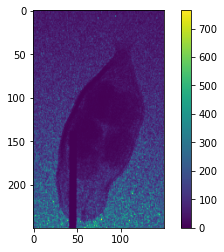

In [6]:
# Now that we've done that, let's load the bucket and idler into easy to use variables and see some information about them.  Note that this object has an ROI already defined, so this will only return ROI pixels.
bucket, idler = exp.get_data()
print("Bucket shape: "+str(bucket.shape))

# And let's print a bucket frame to see what we're working with:  
plt.imshow(bucket[0])
plt.colorbar()

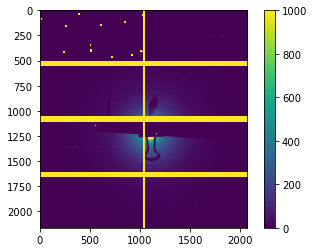

In [7]:
# Note that by calling get_data() with roi = False, we can access the whole bucket:
bucket, idler = exp.get_data(roi = False)
plt.imshow(bucket[0], vmax= 1000)
plt.colorbar()

Changing ROI start to: [910, 1085]
Changing ROI size to: [15, 15]
Bucket shape: (1000, 15, 15)


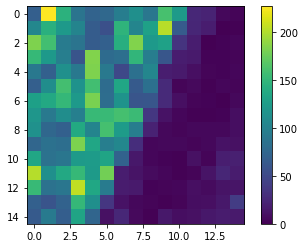

In [8]:
# But we probably want to focus on the ROI.  Some of the objects in the Experiments dictionary have a pre-set ROI, others don't.  Either way, to change the ROI size and area we can do that:
exp.set_roistart([910, 1085])
exp.set_roisize([15, 15])

# Just make sure to update your variables (if you are not calling get_data(), get_bucket(), or get_idler() directly later):
bucket, idler = exp.get_bucket(), exp.get_idler()
print("Bucket shape: "+str(bucket.shape))
plt.imshow(bucket[0])
plt.colorbar()

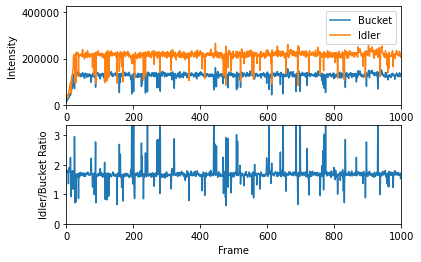

In [9]:
# Now we might want to inspect the data and remove some bad frames.  Let's look at the sum of frame intensity vs frame for our dataset:
sums = exp.frame_sums(bad = False, plot = True)

Bad frames found with indices [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 24, 26, 28, 36, 74, 78, 83, 84, 87, 88, 114, 116, 121, 124, 127, 151, 158, 161, 165, 169, 195, 197, 198, 200, 201, 202, 203, 204, 224, 226, 230, 236, 242, 262, 271, 274, 278, 279, 280, 313, 322, 366, 405, 413, 440, 443, 445, 448, 468, 469, 475, 476, 477, 482, 483, 492, 508, 511, 520, 530, 555, 559, 569, 578, 598, 605, 611, 613, 639, 647, 656, 661, 686, 691, 698, 719, 724, 758, 763, 766, 768, 770, 774, 810, 827, 828, 830, 833, 866, 886, 893, 896, 930, 937, 957, 960, 963, 976]
Bad frames saved in object.


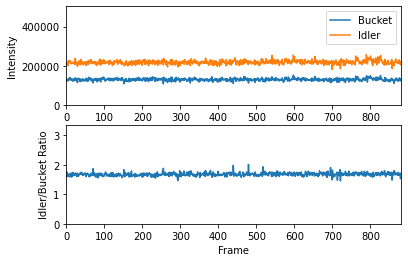

In [10]:
# We can see there are some bad frames (intensity is saturated or zero).  Let's remove ones that are too far away from the median value and see how it looks then:
exp.remove_bad_frames(scale = 1.2, update = True)

# Now that they've been removed, let's get new sums and plot it again:
sums = exp.frame_sums()

Max intensity: 4233


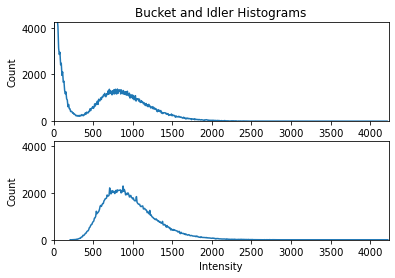

In [11]:
# We can also plot intensity histograms.  Here let's plot histograms for the 1st (0th index) frame:
bhist, ihist = exp.intensity_histogram(0, bins = 500)

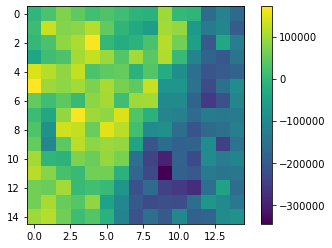

In [12]:
# Finally, let's try to use the differential ghost imaging algorithm on the data:
ghost = exp.dgi()
plt.figure()
plt.imshow(ghost)
plt.colorbar()